<a id="TableOfContents"></a>
# TABLE OF CONTENTS:
<li><a href='#imports'>Imports</a></li>
<li><a href='#setup'>Setup</a></li>
<li><a href='#scale'>Scaling</a></li>
<li><a href="#explore">Explore</a></li>
<li><a href='#extra'>Extra</a></li>

<a id="imports"></a>
# Imports:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Vectorization and tables
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# sklearn
from sklearn.preprocessing import RobustScaler

# Itertools
import itertools

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# .py files
import wrangle
import explore

<a id="setup"></a>
# Setup:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [2]:
# Acquire, prepare, and split zillow dataframe
train, validate, test = wrangle.wrangle_zillow_mvp()

train.shape:(29366, 10)
validate.shape:(12586, 10)
test.shape:(10489, 10)


In [3]:
# Obtain samples
train_sample, validate_sample, test_sample = wrangle.sample_dataframe(train, validate, test)
train_sample.shape, validate_sample.shape, test_sample.shape

((1000, 10), (428, 10), (357, 10))

<a id="scale"></a>
# Scaling:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [4]:
# Identify columns to be scaled
scale_cols = [
    'bedrooms',
    'home_sqft',
    'full_bathrooms',
    'lotsize_sqft',
    'home_age',
    'home_lot_ratio'
]

# Scale columns using robustscaler for dataframes
train_sample_scale, validate_sample_scale, test_sample_scale = wrangle.scale(train_sample, validate_sample, test_sample, scale_cols, RobustScaler())
train_sample_scale.sample()

,bedrooms,home_sqft,full_bathrooms,lotsize_sqft,home_age,value,home_lot_ratio,county_Los Angeles,county_Orange,county_Ventura
4585,0.0,-0.252908,0.0,-0.400926,0.034483,93978.0,0.133333,1,0,0


<a id="explore"></a>
# Explore:
<li><a href='#TableOfContents'>Table of Contents</a></li>

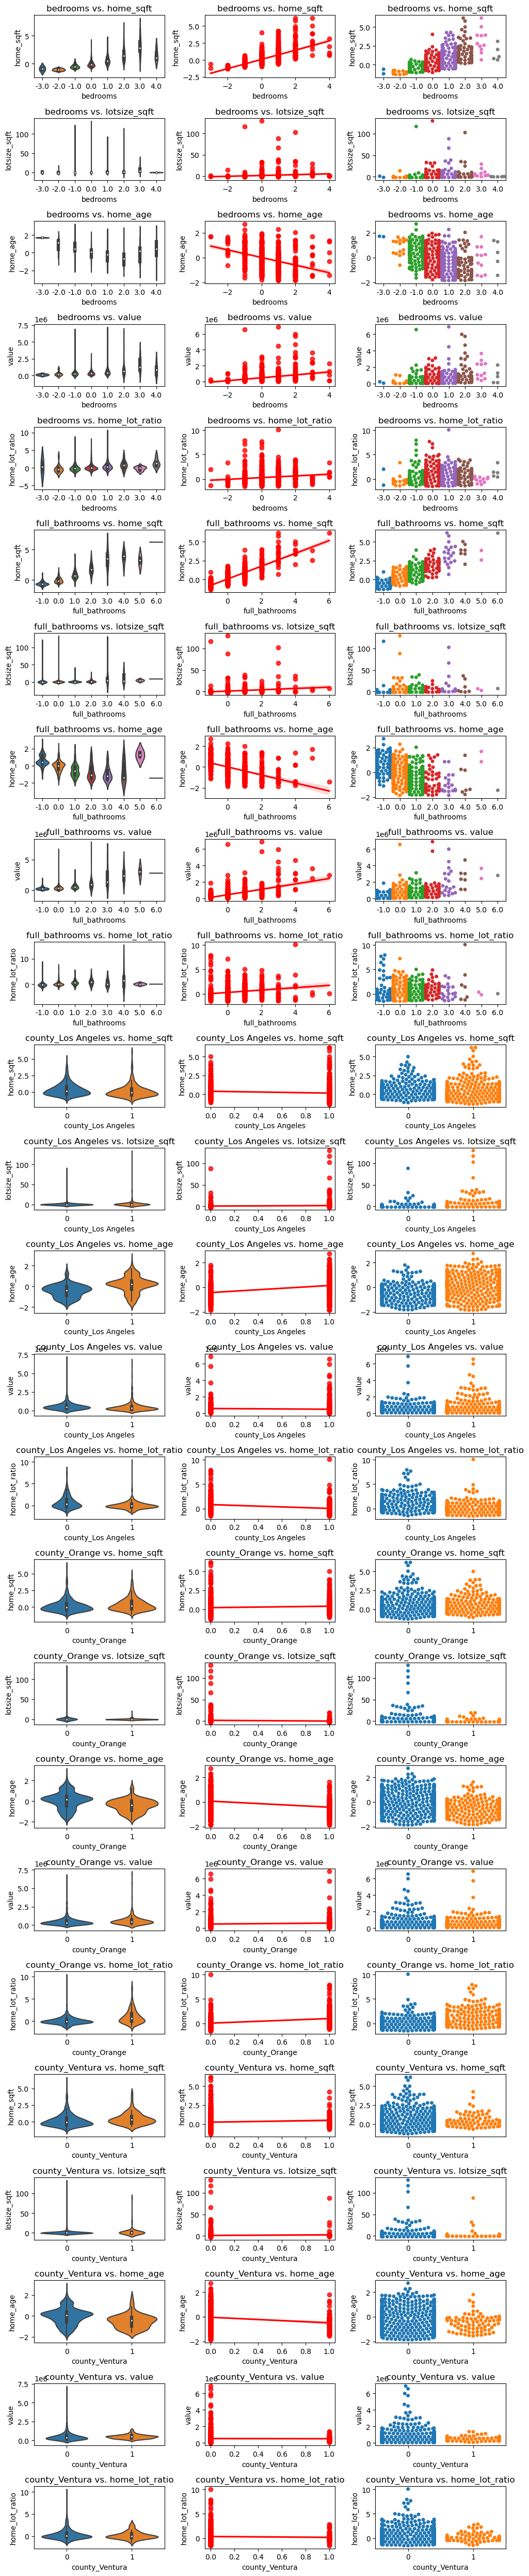

In [5]:
# Visualize dataframe
explore.vis3_catandcont(train_sample_scale, 10, 50, 0.08)

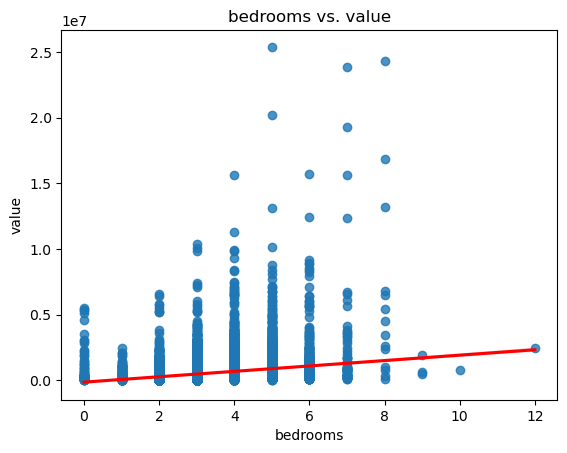

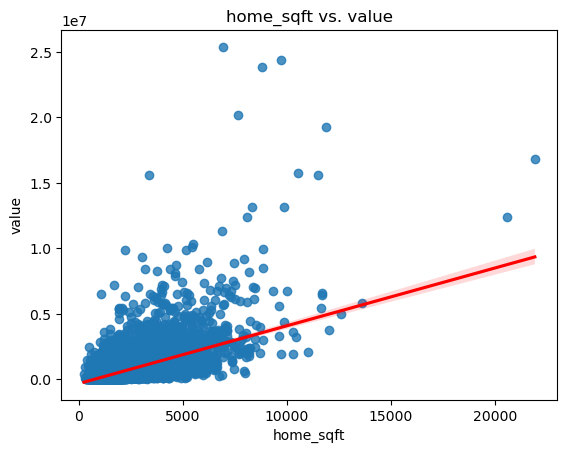

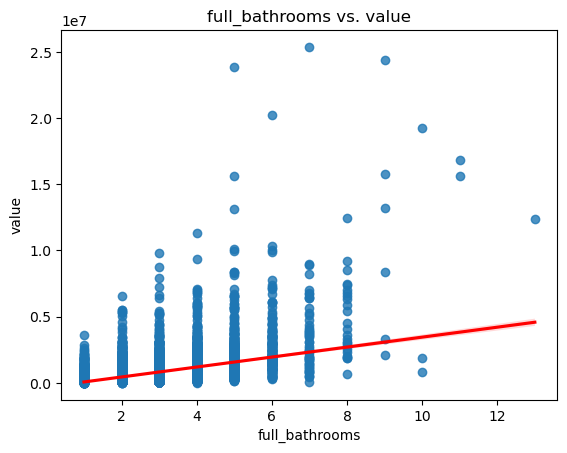

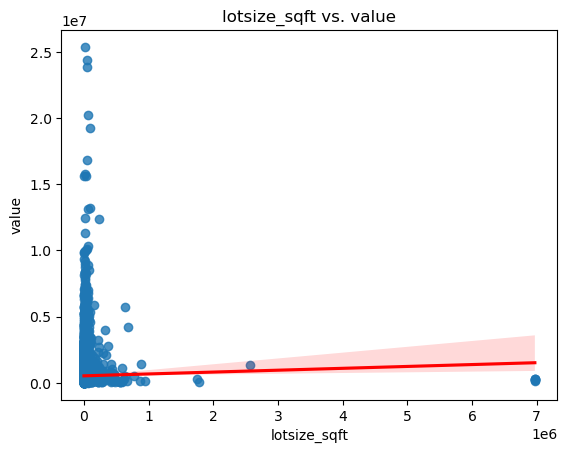

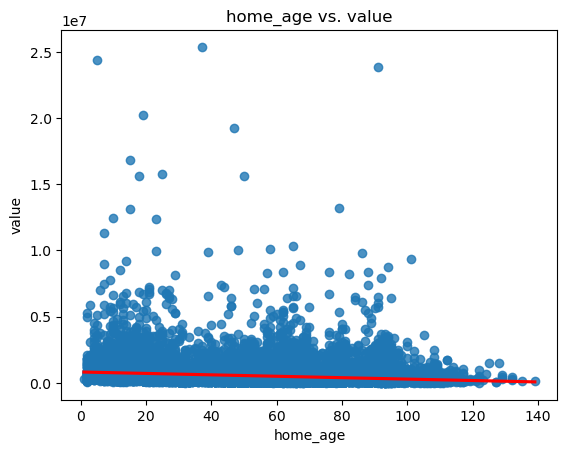

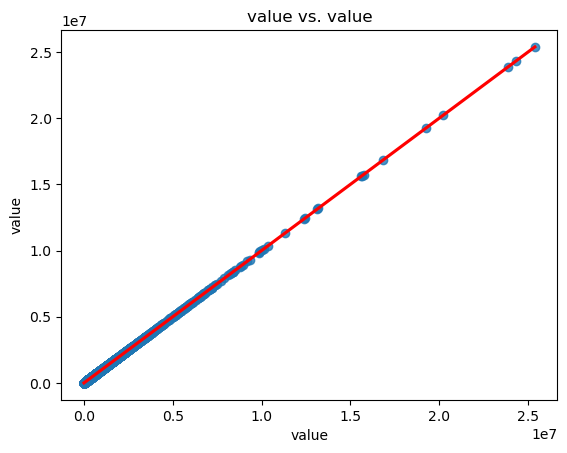

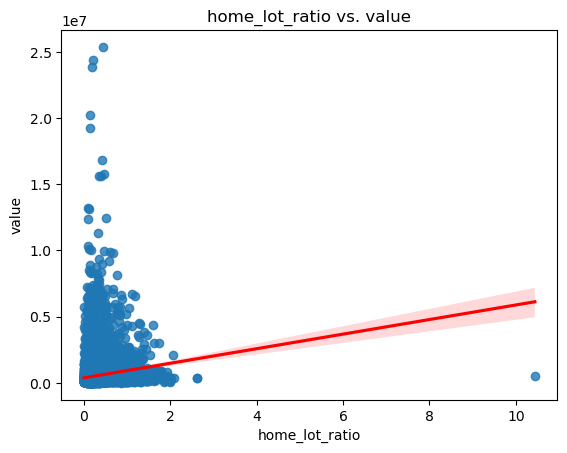

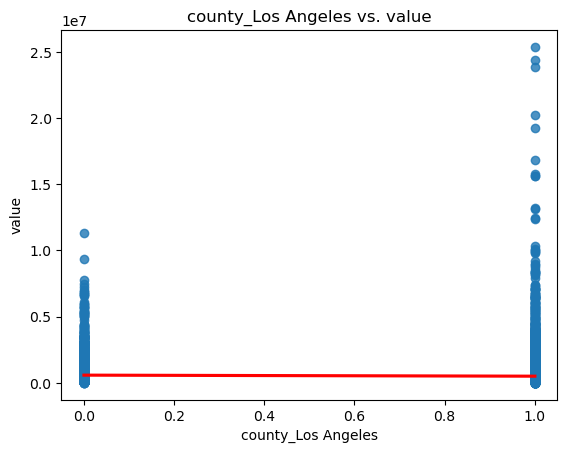

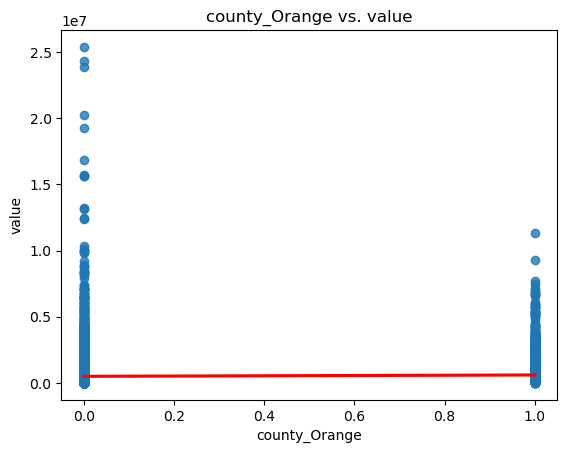

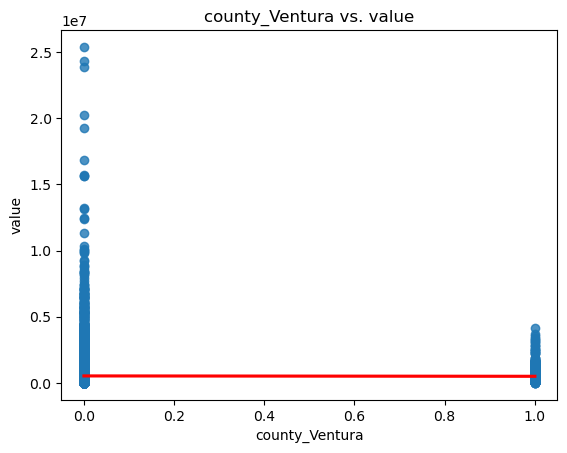

In [14]:
for col in train:
    sns.regplot(data=train, x=train[col], y='value', line_kws={'color': 'red'})
    plt.title(f'{col} vs. value')
    plt.show()

##### Possible features based on visuals
- 'bedrooms'
- 'home_sqft'
- 'full_bathrooms'
- 'home_lot_ratio'

In [6]:
train_sample_scale.corr()

,bedrooms,home_sqft,full_bathrooms,lotsize_sqft,home_age,value,home_lot_ratio,county_Los Angeles,county_Orange,county_Ventura
bedrooms,1.000000,0.648865,0.631107,0.110155,-0.364757,0.275543,0.138320,-0.094632,0.050936,0.083229
home_sqft,0.648865,1.000000,0.823933,0.227450,-0.461044,0.558222,0.230784,-0.116732,0.084800,0.065847
full_bathrooms,0.631107,0.823933,1.000000,0.178352,-0.468275,0.504536,0.196373,-0.035407,0.019125,0.031029
lotsize_sqft,0.110155,0.227450,0.178352,1.000000,-0.085069,0.093996,-0.255811,0.062503,-0.090450,0.040238
home_age,-0.364757,-0.461044,-0.468275,-0.085069,1.000000,-0.190491,-0.334631,0.348190,-0.278436,-0.153685
value,0.275543,0.558222,0.504536,0.093996,-0.190491,1.000000,0.182177,-0.067093,0.076580,-0.008814
home_lot_ratio,0.138320,0.230784,0.196373,-0.255811,-0.334631,0.182177,1.000000,-0.315442,0.357272,-0.036787
county_Los Angeles,-0.094632,-0.116732,-0.035407,0.062503,0.348190,-0.067093,-0.315442,1.000000,-0.834417,-0.383142
county_Orange,0.050936,0.084800,0.019125,-0.090450,-0.278436,0.076580,0.357272,-0.834417,1.000000,-0.189376
county_Ventura,0.083229,0.065847,0.031029,0.040238,-0.153685,-0.008814,-0.036787,-0.383142,-0.189376,1.000000


##### Possible features based on corr
- 'bedrooms'
- 'home_sqft'
- 'full_bathrooms'
- 'lotsize_sqft'
- 'home_age'
- 'home_lot_ratio'

<a id="extra"></a>
# Extra:
<li><a href='#TableOfContents'>Table of Contents</a></li>